**Banking Marketing Targets**
<br> *Analisis oleh:*
- Maghfira Amalia
- Mahendra Prabaswara
- Ridwan Donovan
- Windy Nurfikri

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from google.colab import files
import io

In [65]:
df = pd.read_csv('train.csv', sep = ';')
df.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40774,70,blue-collar,married,primary,no,3075,no,no,telephone,10,aug,74,1,-1,0,unknown,no
23160,37,management,single,tertiary,no,0,no,no,cellular,26,aug,99,6,-1,0,unknown,no
26742,41,blue-collar,married,primary,no,-52,yes,yes,cellular,20,nov,642,2,-1,0,unknown,no
17657,46,technician,married,tertiary,no,529,yes,yes,cellular,29,jul,208,2,-1,0,unknown,no
34311,45,technician,married,secondary,no,280,yes,no,cellular,4,may,562,3,168,2,other,no
2305,25,admin.,single,secondary,no,1,yes,yes,unknown,12,may,24,12,-1,0,unknown,no
22969,49,unemployed,married,primary,no,50,no,no,cellular,26,aug,169,2,-1,0,unknown,no
30608,49,self-employed,married,tertiary,no,503,yes,no,cellular,6,feb,310,4,200,1,failure,no
4950,29,admin.,married,secondary,no,688,yes,no,unknown,21,may,211,1,-1,0,unknown,no
15316,45,management,married,tertiary,no,726,yes,yes,cellular,18,jul,199,1,-1,0,unknown,no


#Exploratory Data

##Descriptive Statistic

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4870,34,services,married,secondary,no,1270,yes,no,unknown,21,may,494,3,-1,0,unknown,no
31319,44,management,married,tertiary,no,1058,no,no,cellular,11,mar,188,3,-1,0,unknown,yes
23873,32,management,single,tertiary,no,769,no,no,cellular,29,aug,695,2,-1,0,unknown,yes
23026,36,management,married,tertiary,no,1313,no,no,cellular,26,aug,80,6,-1,0,unknown,no
16626,47,housemaid,married,primary,no,0,yes,no,telephone,24,jul,193,1,-1,0,unknown,no


Pada kolom `job` ada value ‘admin.’ yang mana seharusnya penulisan tidak perlu menggunakan tanda titik (.) seperti pekerjaan lainnya. Selebihnya, semua tipe data sudah sesuai.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


tidak ada kolom dengan nilai kosong

In [66]:
cats = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- pada kolom `previous` nampak issue pada nilai maksimalnya, dimana salah satu customer dihubungi pada campaign sebelumnya sebanyak 275 kali. Kemungkinan akan di drop pada saat pre-processing.
- kolom `balance`, `duration`, dan `pdays` tampak right-skewed (median < mean).
- kolom `age`, `day`, dan `campaign` tampaknya memiliki distribusi yang cukup simetris (median dan mean tidak berbeda signifikan).


In [ ]:
df[cats].describe()

,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,3,4,2,2,2,3,12,4,2
top,married,secondary,no,yes,no,cellular,may,unknown,no
freq,27214,23202,44396,25130,37967,29285,13766,36959,39922


- Data didominasi oleh customer yang sudah menikah (`marital`) dan/atau tidak memiliki piutang (`default`) ataupun pinjaman (`loan`).
- lebih dari 75% data customer tidak diketahui hasil/output dari campaign sebelumnya (`poutcome`).

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Banyak nasabah yang tidak melakukan deposito

In [ ]:
print("Data Variables Unique Values List:\n")
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique(), "\n")

Data Variables Unique Values List:

age :
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

job :
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital :
['married' 'single' 'divorced'] 

education :
['tertiary' 'secondary' 'unknown' 'primary'] 

default :
['no' 'yes'] 

balance :
[ 2143    29     2 ...  8205 14204 16353] 

housing :
['yes' 'no'] 

loan :
['no' 'yes'] 

contact :
['unknown' 'cellular' 'telephone'] 

day :
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] 

month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration :
[ 261  151   76 ... 1298 1246 1556] 

campaign :
[ 1  2  3  5  4  6  7  8  9 10 11 12 1

## Univariate Analysis

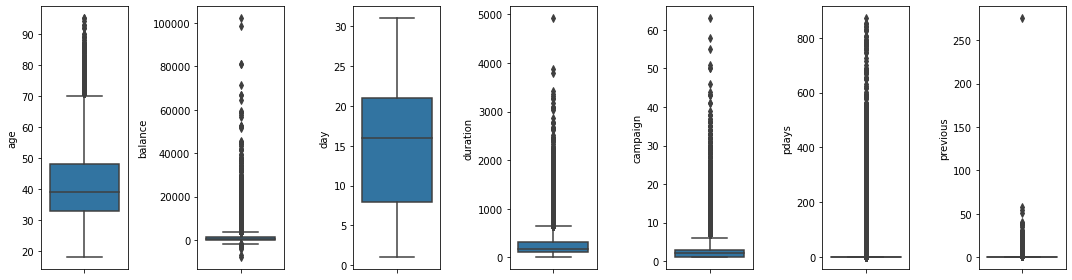

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=df[nums[i]], orient='v')
  plt.tight_layout()

* Pada kolom `previous` dan `duration` terdapat outlier yang berbeda sangat signifikan.


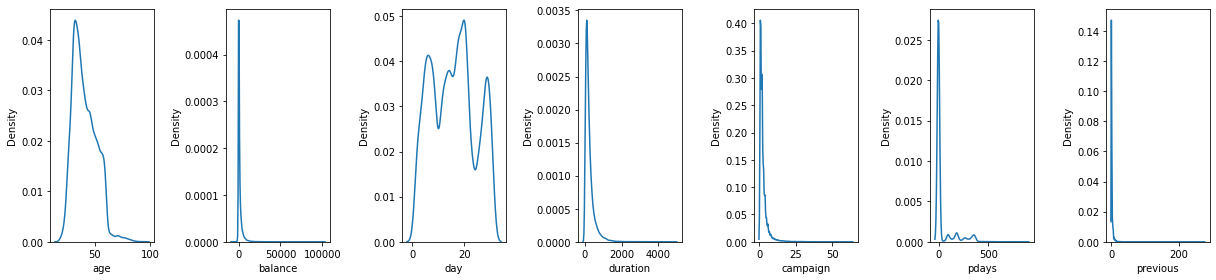

In [ ]:
plt.figure(figsize=(17, 4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.kdeplot(x=df[nums[i]])
  plt.tight_layout()

hampir semua fiture numerical, distribusi datanya (sangat) right-skewed.

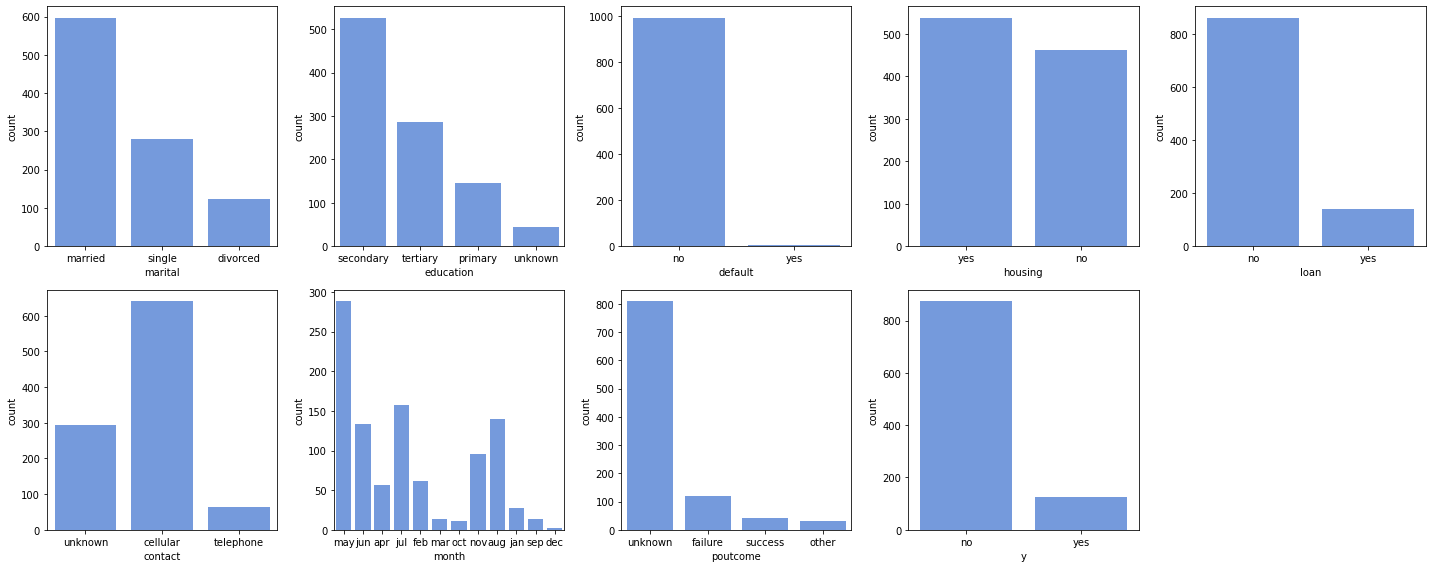

In [ ]:
cat_sample = df.sample(1000, random_state=42)
plt.figure(figsize=(20, 8))
for i in range(0, len(cats)):
  plt.subplot(2, 5, i+1)
  sns.countplot(x=cat_sample[cats[i]], color = 'cornflowerblue')
  plt.tight_layout()

hampir seluruh fiture data categorical memiliki ketimpangan, kecuali `housing`.

## Multivariate Analysis

Encoding `y` untuk kebutuhan cek korelasi fiture dengan target output.

In [67]:
def segment(x):
    if x['y'] == 'yes':
        segment = 1
    else:
        segment = 0
    return segment

In [68]:
df['y'] = df.apply(lambda x: segment(x), axis= 1)
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35479,52,management,married,tertiary,no,-1224,yes,no,cellular,7,may,253,4,-1,0,unknown,0
40316,22,student,single,tertiary,no,1161,no,yes,cellular,16,jun,119,1,-1,0,unknown,0
44487,60,technician,married,secondary,no,824,yes,no,cellular,9,aug,265,1,181,8,success,1
37445,43,services,single,secondary,no,550,yes,no,cellular,13,may,107,2,-1,0,unknown,0
26054,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,-1,0,unknown,0
44981,52,technician,married,secondary,no,553,yes,no,telephone,11,oct,160,1,-1,0,unknown,0
1051,41,blue-collar,married,secondary,no,-15,yes,no,unknown,7,may,169,2,-1,0,unknown,0
19277,47,technician,married,secondary,no,2480,no,no,cellular,6,aug,763,2,-1,0,unknown,1
42588,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,dec,158,3,-1,0,unknown,0
6508,26,student,single,secondary,no,2784,yes,no,unknown,27,may,264,1,-1,0,unknown,0


In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


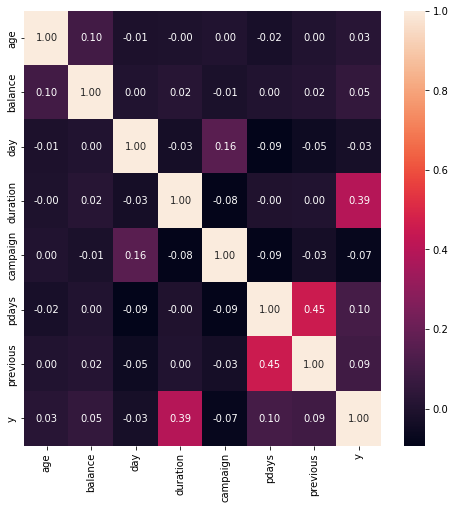

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat disimpulkan bahwa:
* `y` memiliki potensi korelasi yang tinggi dengan `duration` (strong potential correlation)
* `y` juga memiliki korelasi yang lemah dengan `previous` dan `pdays` (decent potential feature)
* Target kita `campaign` memiliki korelasi positif dengan `day` 
* Sedangkan korelasi `campaign` dengan `age` sangat lemah, kemungkinan bukan fitur yang potensial
* ada korelasi antar `previous` dengan `pdays`, namun tidak cukup kuat untuk dikatakan redundant

<Figure size 576x576 with 0 Axes>

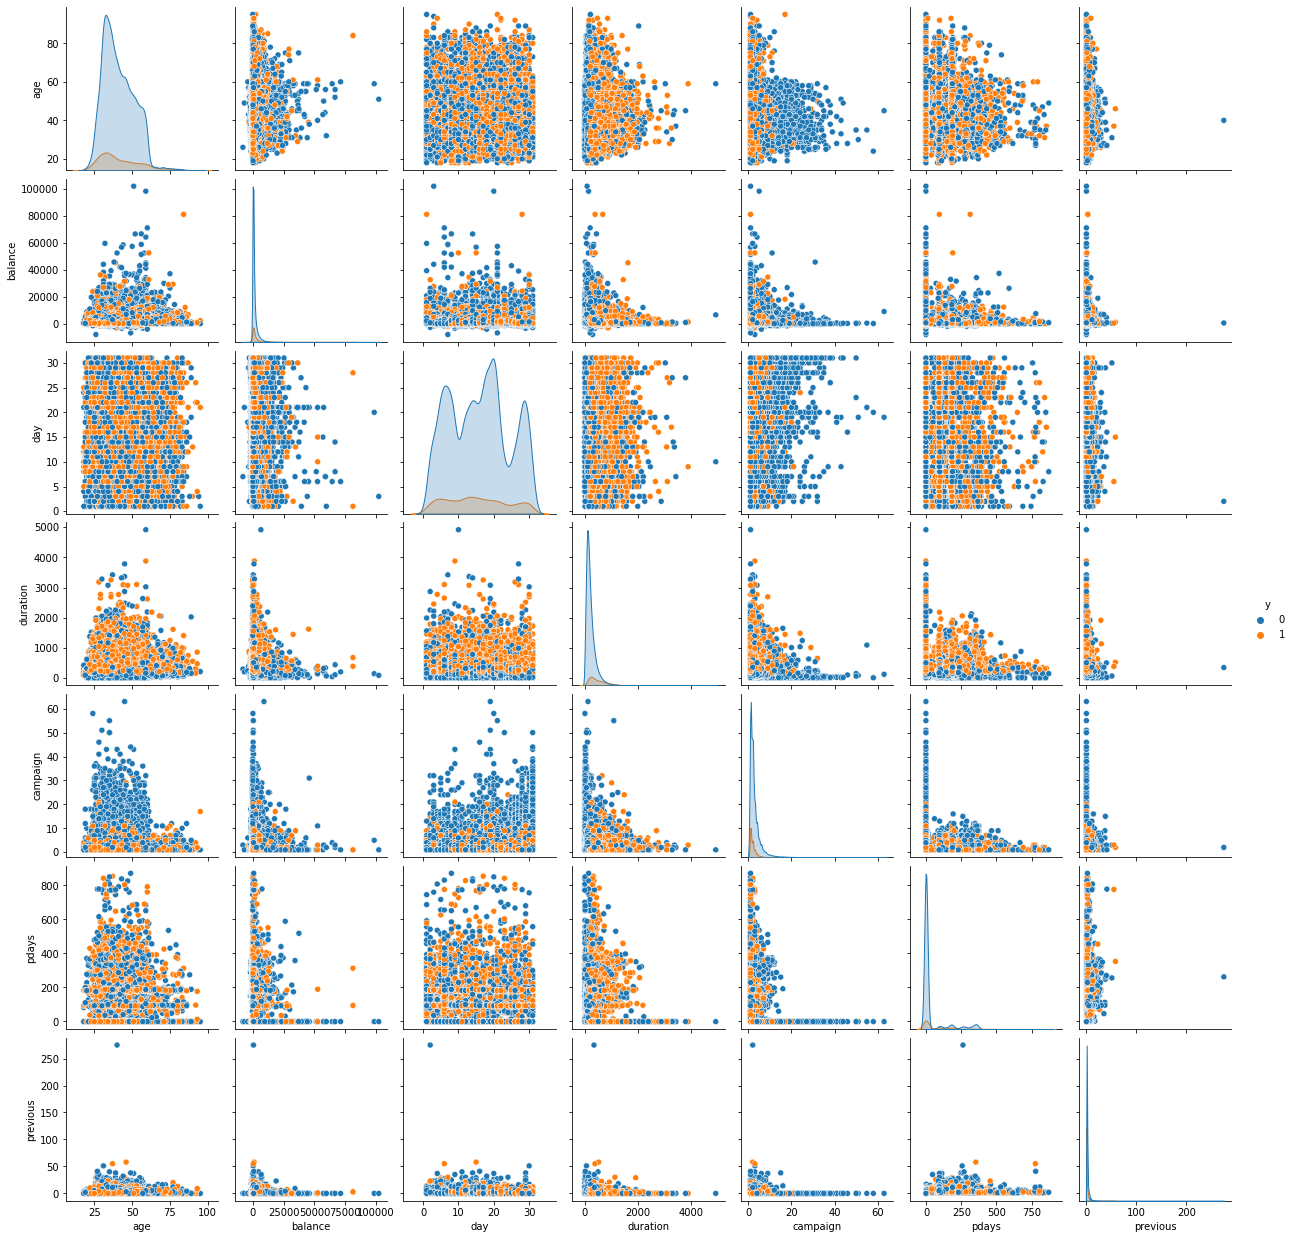

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, diag_kind='kde', hue='y')

Dari pair plot di atas, dapat disimpulkan hal yang serupa bahwa:
* belum ada yang memiliki korelasi linier


In [69]:
cats2 = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
nums2 = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


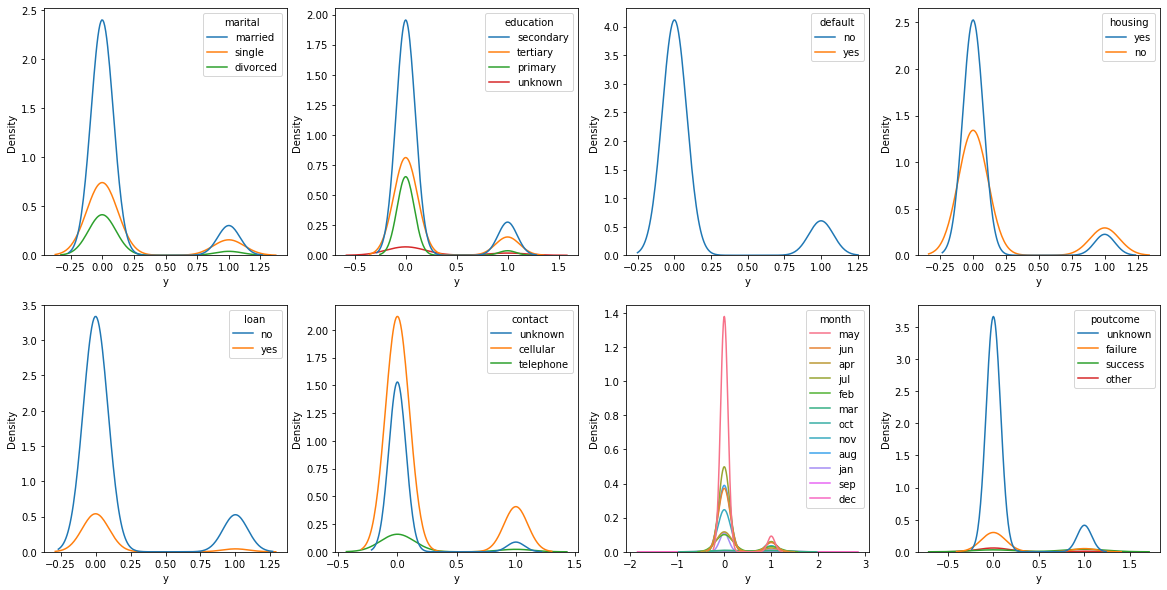

In [ ]:
cat_sample2 = df[cats].sample(1000, random_state=42)
features = cats2
plt.figure(figsize=(20, 10))

for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) 
    sns.kdeplot(data=cat_sample2, x='y', hue=features[i])

- Setiap fiture memiliki puncak distribusi dengan nilai x axis yang hampir sama

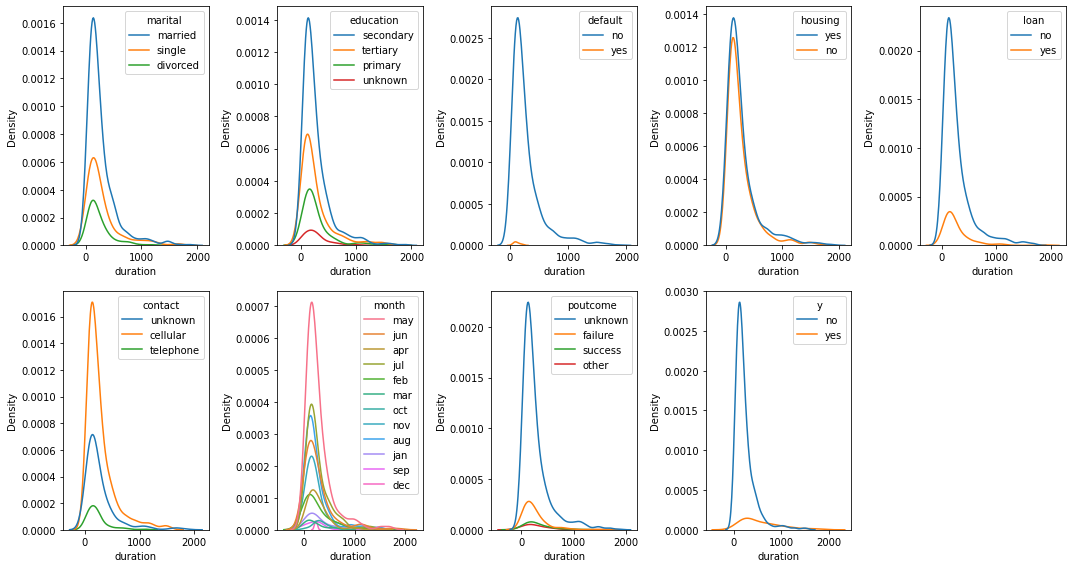

In [ ]:
features = cats
plt.figure(figsize=(15, 8))
for i in range(0, len(features)):
    plt.subplot(2, 5, i+1) 
    sns.kdeplot(data=cat_sample, x='duration', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

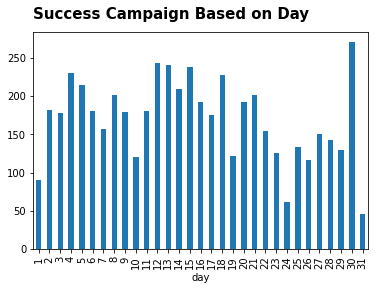

In [ ]:
dy = df[df['y'] == 1]

dy_cpg = dy.groupby('day')['campaign'].count()

dy_cpg.plot(x='day', y='campaign', kind='bar')
plt.title("Success Campaign Based on Day", loc='left', y=1.03, fontsize=15, weight='bold')
plt.show()

campaign yg menghasilkan output positif (customer subscribed to deposit) jarang terjadi pada akhir bulan, kecuali tanggal 30, yang diperkirakan merupakan pay day.

## EDA Conclusion
Dapat disimpulkan bahwa:
* Data terlihat valid dan tidak ada kecacatan yang signifikan
* Mayoritas data memiliki distribusi yang *skewed*
* Ada *feature* yang memiliki korelasi dengan *target*
* Ada beberapa *feature* yang terlihat sama sekali tidak berkorelasi

#Pre-processing



In [ ]:
df.duplicated().sum()

0

Data tidak ada yang duplikat

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data tidak ada yang null

##Attribut Exploration

### Pengaruh Job Terhadap y

In [ ]:
df2 = pd.read_csv('train.csv', sep = ';')
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_job = df2.groupby(['job', 'y']).agg({'y': 'count'}).rename(columns={'y':'jumlah'}).reset_index()
df_job['total'] = df_job.groupby(['job'])['jumlah'].transform('sum')
df_job['percentage'] = round(df_job['jumlah'] * 100 / df_job['total'],2)
df_job

,job,y,jumlah,total,percentage
0,admin.,no,4540,5171,87.80
1,admin.,yes,631,5171,12.20
2,blue-collar,no,9024,9732,92.73
3,blue-collar,yes,708,9732,7.27
4,entrepreneur,no,1364,1487,91.73
5,entrepreneur,yes,123,1487,8.27
6,housemaid,no,1131,1240,91.21
7,housemaid,yes,109,1240,8.79
8,management,no,8157,9458,86.24
9,management,yes,1301,9458,13.76


In [ ]:
subscribed_job = df_job['y']
job = df_job['job']
jumlah_job = df_job['jumlah']
percentage_job = df_job[df_job['y'] == 'yes']['percentage']

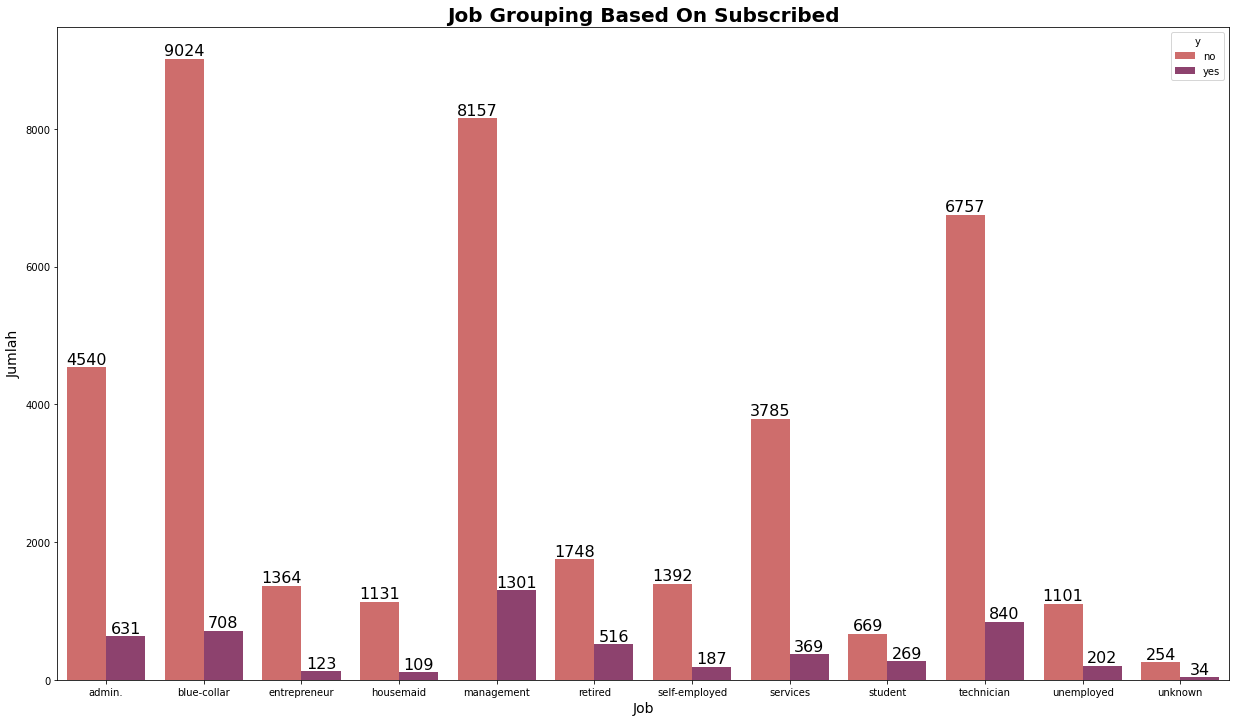

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x =job, y=jumlah_job, hue =subscribed_job, palette = 'flare');
plt.title('Job Grouping Based On Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Job', fontsize = 14)
plt.ylabel('Jumlah', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+50, s = '{:.0f}'.format(height), ha = 'center', fontsize = 16);

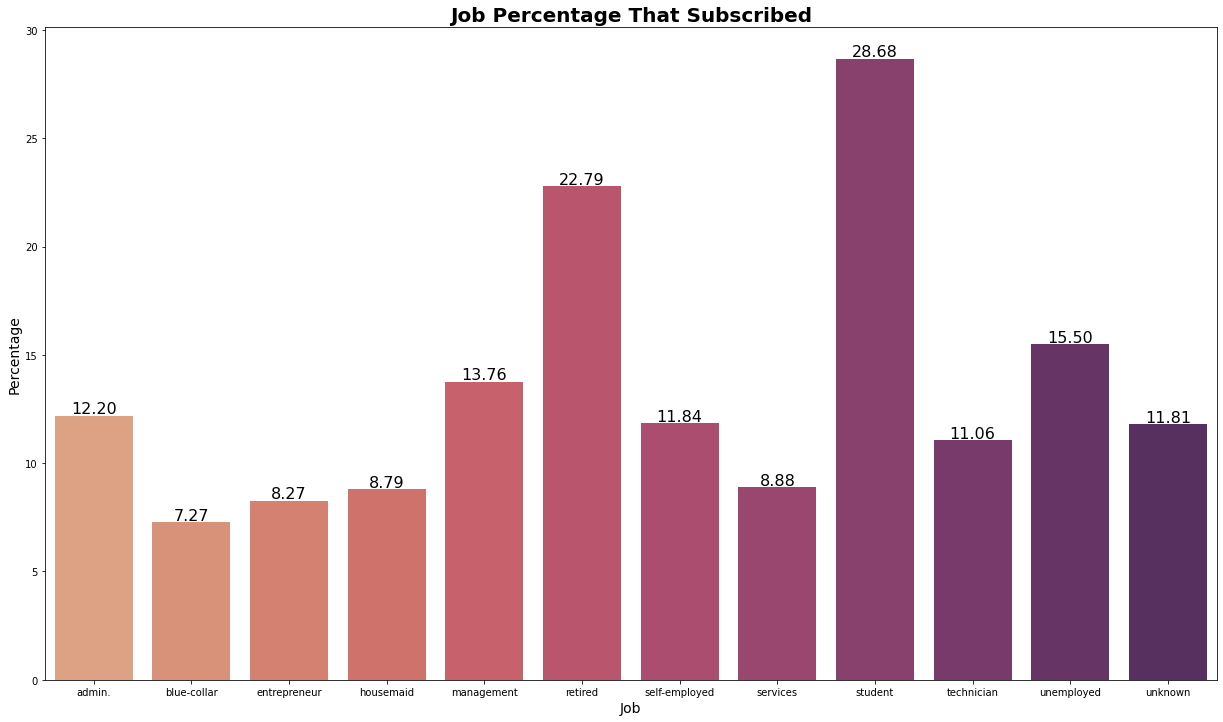

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x =job, y=percentage_job, palette = 'flare');
plt.title('Job Percentage That Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Job', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.1, s = '{:.2f}'.format(height), ha = 'center', fontsize = 16);

### Pengaruh Marital Terhadap y

In [ ]:
df_mar = df2.groupby(['marital', 'y']).agg({'y': 'count'}).rename(columns={'y':'jumlah'}).reset_index()
df_mar['total'] = df_mar.groupby(['marital'])['jumlah'].transform('sum')
df_mar['percentage'] = round(df_mar['jumlah'] * 100 / df_mar['total'],2)
df_mar

,marital,y,jumlah,total,percentage
0,divorced,no,4585,5207,88.05
1,divorced,yes,622,5207,11.95
2,married,no,24459,27214,89.88
3,married,yes,2755,27214,10.12
4,single,no,10878,12790,85.05
5,single,yes,1912,12790,14.95


In [ ]:
subscribed_mar = df_mar['y']
marital = df_mar['marital']
jumlah_mar = df_mar['jumlah']
percentage_mar = df_mar[df_mar['y'] == 'yes']['percentage']

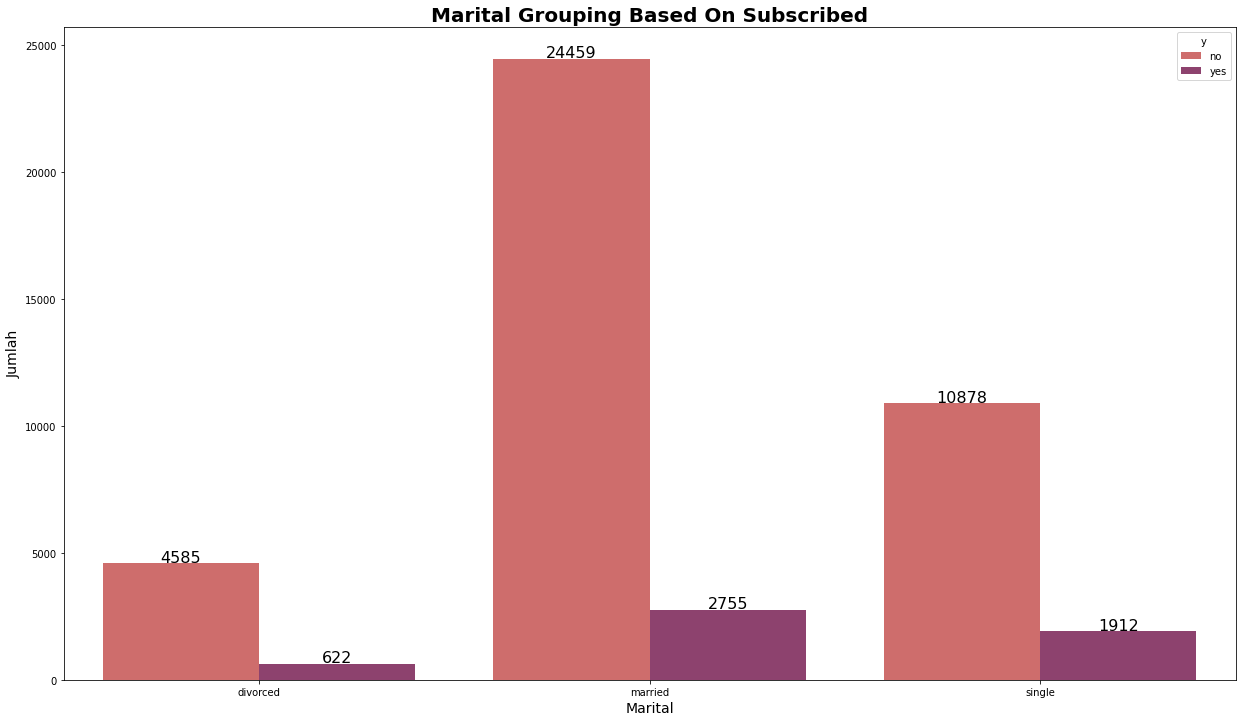

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x =marital, y=jumlah_mar, hue =subscribed_mar, palette = 'flare');
plt.title('Marital Grouping Based On Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Marital', fontsize = 14)
plt.ylabel('Jumlah', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+50, s = '{:.0f}'.format(height), ha = 'center', fontsize = 16);

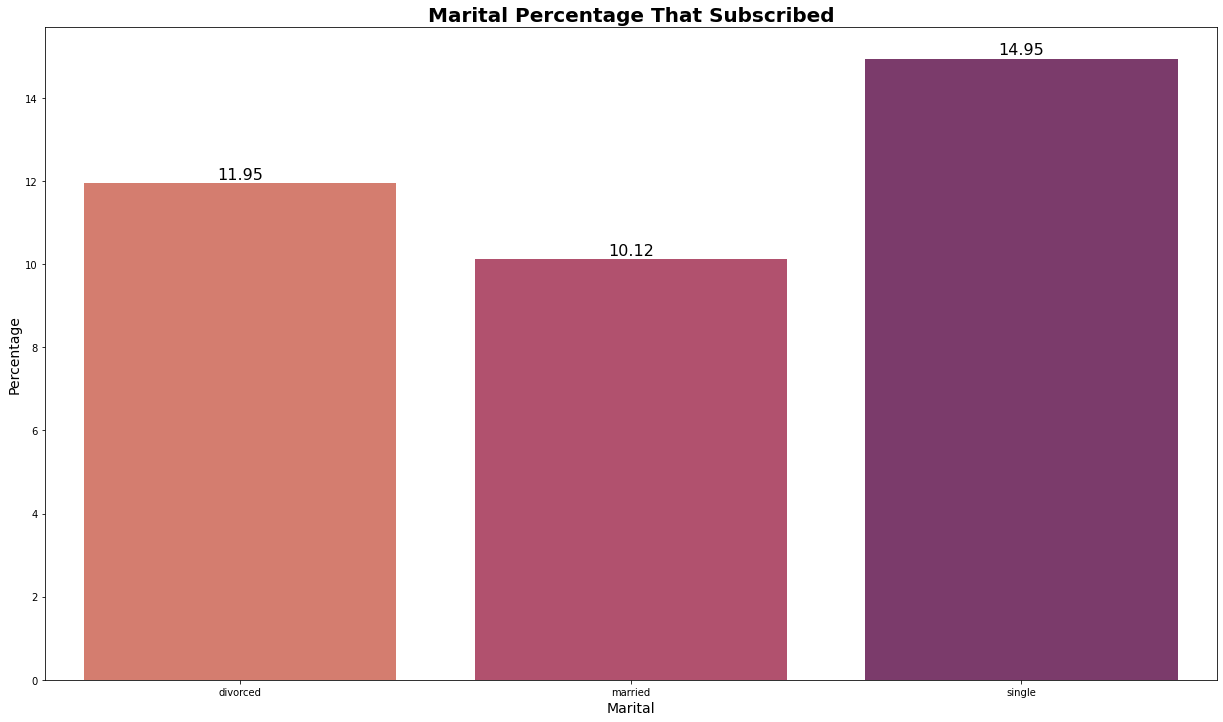

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x =marital, y=percentage_mar, palette = 'flare');
plt.title('Marital Percentage That Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Marital', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.1, s = '{:.2f}'.format(height), ha = 'center', fontsize = 16);

### Pengaruh Education Terhadap y


In [ ]:
df_edu = df2.groupby(['education', 'y']).agg({'y': 'count'}).rename(columns={'y':'jumlah'}).reset_index()
df_edu['total'] = df_edu.groupby(['education'])['jumlah'].transform('sum')
df_edu['percentage'] = round(df_job['jumlah'] * 100 / df_job['total'],2)
df_edu

,education,y,jumlah,total,percentage
0,primary,no,6260,6851,87.80
1,primary,yes,591,6851,12.20
2,secondary,no,20752,23202,92.73
3,secondary,yes,2450,23202,7.27
4,tertiary,no,11305,13301,91.73
5,tertiary,yes,1996,13301,8.27
6,unknown,no,1605,1857,91.21
7,unknown,yes,252,1857,8.79


In [ ]:
subscribed_edu = df_edu['y']
education = df_edu['education']
jumlah_edu = df_edu['jumlah']
percentage_edu = df_edu[df_edu['y'] == 'yes']['percentage']

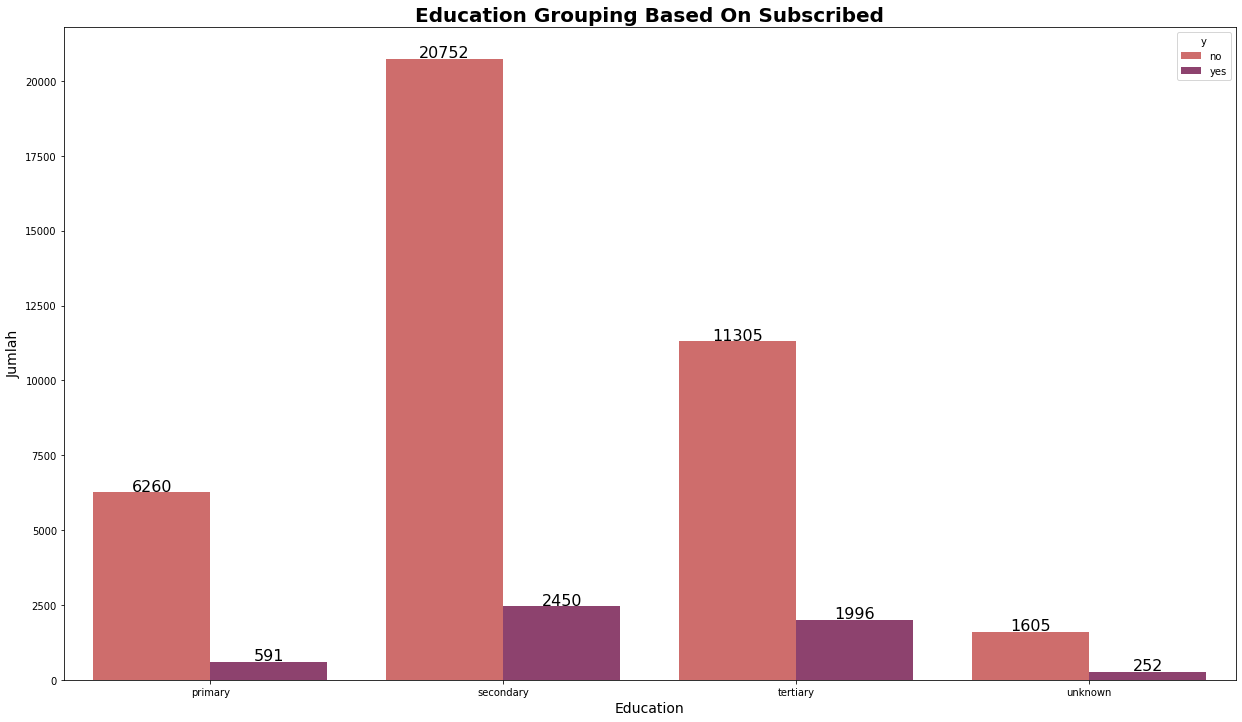

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x =education, y=jumlah_edu, hue =subscribed_edu, palette = 'flare');
plt.title('Education Grouping Based On Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Jumlah', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+50, s = '{:.0f}'.format(height), ha = 'center', fontsize = 16);

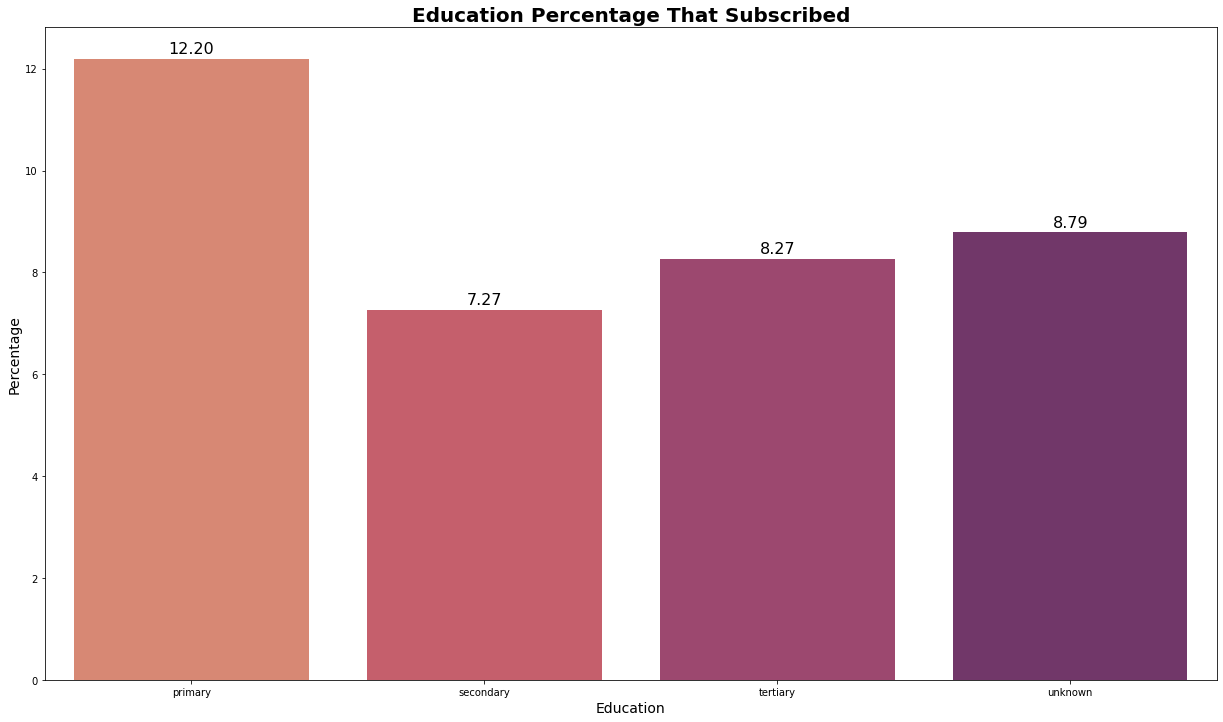

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x =education, y=percentage_edu, palette = 'flare');
plt.title('Education Percentage That Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.1, s = '{:.2f}'.format(height), ha = 'center', fontsize = 16);

### Pengaruh Month Terhadap y

In [ ]:
df_mon = df2.groupby(['month', 'y']).agg({'y': 'count'}).rename(columns={'y':'jumlah'}).reset_index()
df_mon['total'] = df_mon.groupby(['month'])['jumlah'].transform('sum')
df_mon['percentage'] = round(df_mon['jumlah'] * 100 / df_mon['total'],2)
df_mon

,month,y,jumlah,total,percentage
0,apr,no,2355,2932,80.32
1,apr,yes,577,2932,19.68
2,aug,no,5559,6247,88.99
3,aug,yes,688,6247,11.01
4,dec,no,114,214,53.27
5,dec,yes,100,214,46.73
6,feb,no,2208,2649,83.35
7,feb,yes,441,2649,16.65
8,jan,no,1261,1403,89.88
9,jan,yes,142,1403,10.12


In [ ]:
subscribed_mon = df_mon['y']
month = df_mon['month']
jumlah_mon = df_mon['jumlah']
percentage_mon = df_mon[df_mon['y'] == 'yes']['percentage']

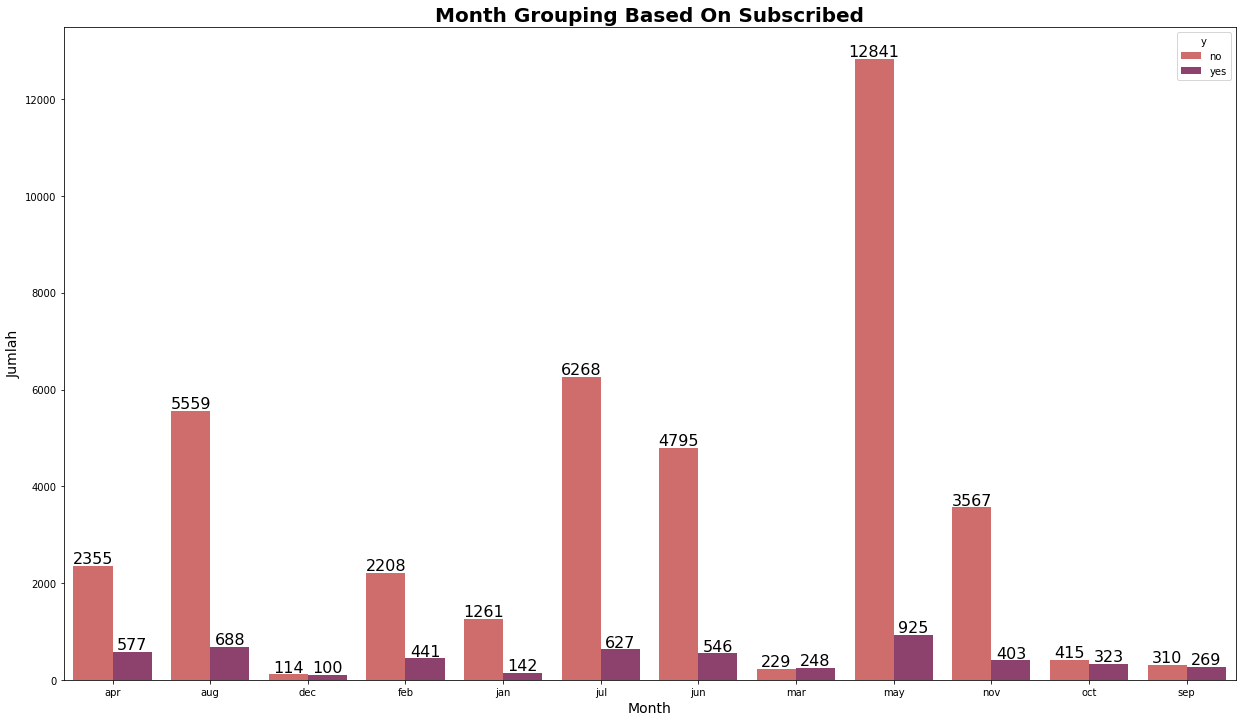

In [ ]:
plt.figure(figsize=(21,12))
barplot = sns.barplot(x = month, y=jumlah_mon, hue =subscribed_mon, palette = 'flare');
plt.title('Month Grouping Based On Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Jumlah', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+50, s = '{:.0f}'.format(height), ha = 'center', fontsize = 16);

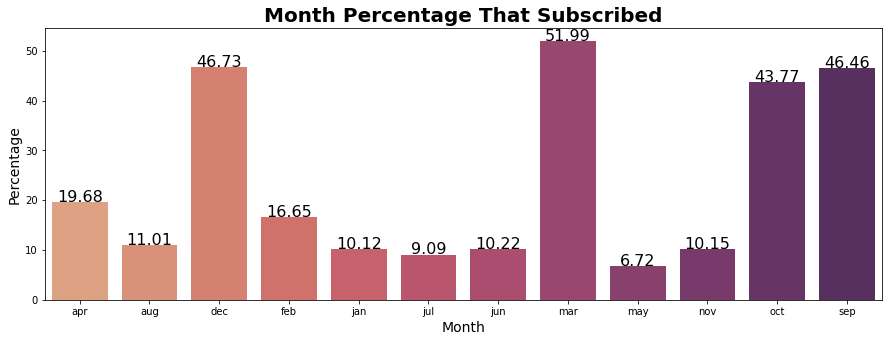

In [ ]:
plt.figure(figsize=(15,5))
barplot = sns.barplot(x =month, y=percentage_mon, palette = 'flare');
plt.title('Month Percentage That Subscribed', fontsize = 20, weight = 'bold')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.1, s = '{:.2f}'.format(height), ha = 'center', fontsize = 16);

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Pengaruh Balance terhadap y

In [ ]:
df2['open'] = np.where(df2['y'] == 'yes', 1, 0)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,open
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
df2['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

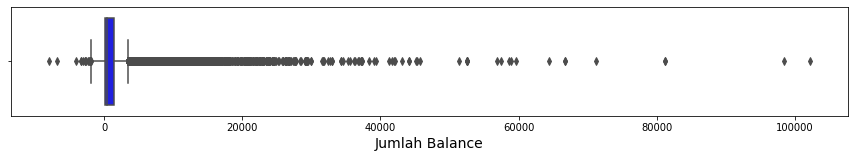

In [ ]:
plt.figure(figsize = (15,2))
sns.boxplot(x='balance', data = df2, color ='blue');
plt.xlabel('Jumlah Balance', fontsize = 14);

User dibagi menjadi 3 jenis berdasarkan balancenya:

First group = balance < 72

Second group = balance >= 72 and balance < 1428

Third group = balance >= 1428

In [ ]:
g1 = df2[df2['balance'] < 72]
g2 = df2[(df2['balance'] >= 72) & (df['balance'] < 1428)]
g3 = df2[df2['balance'] >= 1428]

In [ ]:
g1.shape

(11278, 18)

In [ ]:
g2.shape

(22629, 18)

In [ ]:
g3.shape

(11304, 18)

In [ ]:
open1 = g1['open'].sum()
open2 = g2['open'].sum()
open3 = g3['open'].sum()

obs1 = g1['open'].count()
obs2 = g2['open'].count()
obs3 = g3['open'].count()

In [ ]:
conversion_rate1 = open1/obs1
conversion_rate2 = open2/obs2
conversion_rate3 = open3/obs3

In [ ]:
print('Conversion Rate from Group 1: {0:0.4f}'.format(conversion_rate1))
print('Conversion Rate from Group 2: {0:0.4f}'.format(conversion_rate2))
print('Conversion Rate from Group 3: {0:0.4f}'.format(conversion_rate3))

Conversion Rate from Group 1: 0.0724
Conversion Rate from Group 2: 0.1170
Conversion Rate from Group 3: 0.1614


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


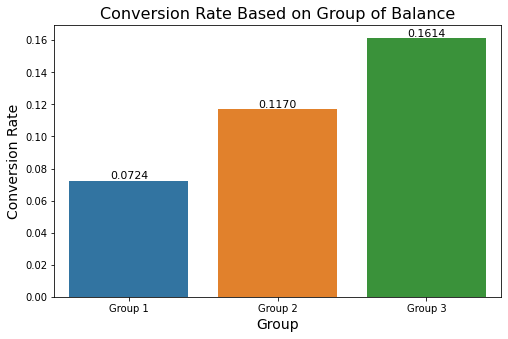

In [ ]:
plt.figure(figsize = (8,5))
bar = ['Group 1','Group 2','Group 3']
value = [conversion_rate1, conversion_rate2, conversion_rate3]
barplot = sns.barplot(bar,value);

plt.title('Conversion Rate Based on Group of Balance', size = 16)
plt.xlabel('Group', fontsize = 14)
plt.ylabel('Conversion Rate', fontsize = 14);

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.001, s = '{0:0.4f}'.format(height), ha = 'center', fontsize = 11);

In [ ]:
test = st.f_oneway(g1['open'], g2['open'], g3['open'])
test

F_onewayResult(statistic=218.9930310165411, pvalue=2.240231689161548e-95)

In [ ]:
p_value = test.pvalue
print('p-value :',p_value)
if p_value >= 0.05:
    print('Dapat disimpulkan bahwa tidak cukup bukti untuk menyatakan bahwa balance dapat mempengaruhi y.')
else :
    print('Dapat disimpulkan bahwa cukup bukti untuk menyatakan bahwa balance dapat mempengaruhi y.')

p-value : 2.240231689161548e-95
Dapat disimpulkan bahwa cukup bukti untuk menyatakan bahwa balance dapat mempengaruhi y.


### Pengaruh Day terhadap y


In [ ]:
df2['day'].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

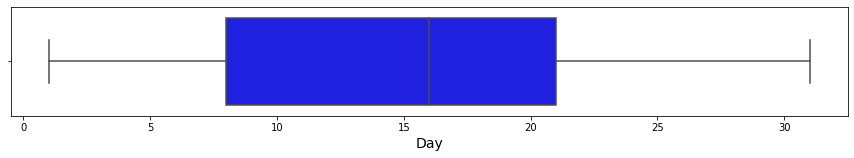

In [ ]:
plt.figure(figsize = (15,2))
sns.boxplot(x='day', data = df2, color ='blue');
plt.xlabel('Day', fontsize = 14);

Dibagi menjadi 3 grup berdasarkan hari:
  - First group = Day 1-10  
  - Second group = Day 11-20
  - Third group = Day 21-31 

In [ ]:
g4 = df2[(df2['day'] >= 1) & (df2['day'] <= 10)]
g5 = df2[(df2['day'] > 10) & (df2['day'] <= 20)]
g6 = df2[df2['day'] > 20]

In [ ]:
g4.shape

(13725, 18)

In [ ]:
g5.shape

(18389, 18)

In [ ]:
g6.shape

(13097, 18)

In [ ]:
open4 = g4['open'].sum()
open5 = g5['open'].sum()
open6 = g6['open'].sum()

obs4 = g4['open'].count()
obs5 = g5['open'].count()
obs6 = g6['open'].count()

In [ ]:
conversion_rate4 = open4/obs4
conversion_rate5 = open5/obs5
conversion_rate6 = open6/obs6

In [ ]:
print('Conversion Rate from Group 4: {0:0.4f}'.format(conversion_rate4))
print('Conversion Rate from Group 5: {0:0.4f}'.format(conversion_rate5))
print('Conversion Rate from Group 6: {0:0.4f}'.format(conversion_rate6))

Conversion Rate from Group 4: 0.1263
Conversion Rate from Group 5: 0.1101
Conversion Rate from Group 6: 0.1169


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


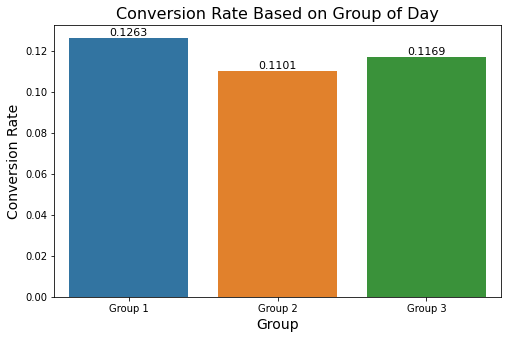

In [ ]:
plt.figure(figsize = (8,5))
bar = ['Group 1','Group 2','Group 3']
value = [conversion_rate4, conversion_rate5, conversion_rate6]
barplot = sns.barplot(bar,value);

plt.title('Conversion Rate Based on Group of Day', size = 16)
plt.xlabel('Group', fontsize = 14)
plt.ylabel('Conversion Rate', fontsize = 14);

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.001, s = '{0:0.4f}'.format(height), ha = 'center', fontsize = 11);

In [ ]:
test2 = st.f_oneway(g4['open'], g5['open'], g6['open'])
test2

F_onewayResult(statistic=10.078084389883408, pvalue=4.208419176717618e-05)

In [ ]:
p_value2 = test2.pvalue
print('p-value :',p_value2)
if p_value2 >= 0.05:
    print('Dapat disimpulkan tidak cukup bukti untuk menyatakan bahwa day dapat mempengaruhi y.')
else :
    print('Dapat disimpulkan cukup bukti untuk menyatakan bahwa day dapat mempengaruhi y')

p-value : 4.208419176717618e-05
Dapat disimpulkan cukup bukti untuk menyatakan bahwa day dapat mempengaruhi y


### Pengaruh Campaign terhadap y

In [ ]:
df2['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

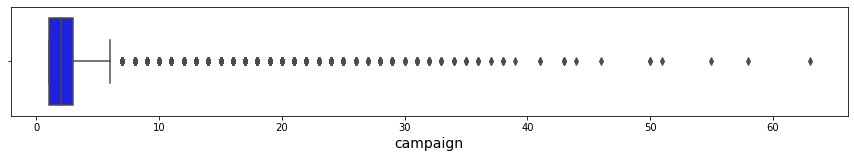

In [ ]:
plt.figure(figsize = (15,2))
sns.boxplot(x='campaign', data = df2, color ='blue');
plt.xlabel('campaign', fontsize = 14);

In [ ]:
g7 = df2[df2['campaign'] <= 1]
g8 = df2[(df2['campaign'] > 1) & (df2['campaign'] <= 3)]
g9 = df2[df2['campaign'] > 3]

User dibagi menjadi 3 grup berdasarkan campaign:
  - First group = < 1 campaigns  
  - Second group = 2-3 campaigns
  - Third group = > 3 campaigns 

In [ ]:
open7 = g7['open'].sum()
open8 = g8['open'].sum()
open9 = g9['open'].sum()

obs7 = g7['open'].count()
obs8 = g8['open'].count()
obs9 = g9['open'].count()

In [ ]:
conversion_rate7 = open7/obs7
conversion_rate8 = open8/obs8
conversion_rate9 = open9/obs9

In [ ]:
print('Conversion Rate from Group 1: {0:0.4f}'.format(conversion_rate7))
print('Conversion Rate from Group 2: {0:0.4f}'.format(conversion_rate8))
print('Conversion Rate from Group 3: {0:0.4f}'.format(conversion_rate9))

Conversion Rate from Group 1: 0.1460
Conversion Rate from Group 2: 0.1120
Conversion Rate from Group 3: 0.0735


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


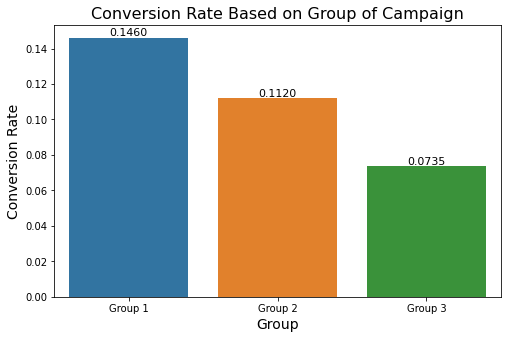

In [ ]:
plt.figure(figsize = (8,5))
bar = ['Group 1','Group 2','Group 3']
value = [conversion_rate7, conversion_rate8, conversion_rate9]
barplot = sns.barplot(bar,value);

plt.title('Conversion Rate Based on Group of Campaign', size = 16)
plt.xlabel('Group', fontsize = 14)
plt.ylabel('Conversion Rate', fontsize = 14);

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.001, s = '{0:0.4f}'.format(height), ha = 'center', fontsize = 11);

In [ ]:
test3 = st.f_oneway(g7['open'], g8['open'], g9['open'])
test3

F_onewayResult(statistic=162.76699316702914, pvalue=3.6684784225122016e-71)

In [ ]:
p_value3 = test3.pvalue
print('p-value :',p_value3)
if p_value3 >= 0.05:
    print('Dapat disimpulkan tidak cukup bukti untuk menyatakan bahwa campaign dapat mempengaruhi y.')
else :
    print('Dapat disimpulkan cukup bukti untuk menyatakan bahwa campaign dapat mempengaruhi y.')

p-value : 3.6684784225122016e-71
Dapat disimpulkan cukup bukti untuk menyatakan bahwa campaign dapat mempengaruhi y.


### Pengaruh Duration terhadap y

In [ ]:
df2['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

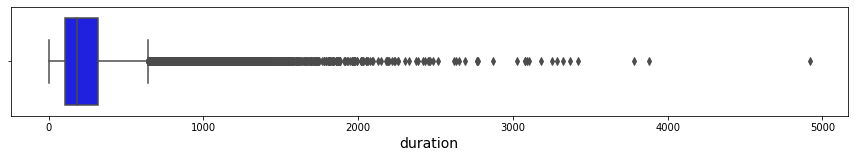

In [ ]:
plt.figure(figsize = (15,2))
sns.boxplot(x='duration', data = df2, color ='blue');
plt.xlabel('duration', fontsize = 14);

In [ ]:
g10 = df2[df2['duration'] < 103]
g11 = df2[(df2['duration'] >= 103) & (df2['duration'] <= 319)]
g12 = df2[df2['duration'] > 319]

In [ ]:
open10 = g10['open'].sum()
open11 = g11['open'].sum()
open12 = g12['open'].sum()

obs10 = g10['open'].count()
obs11 = g11['open'].count()
obs12 = g12['open'].count()

In [ ]:
conversion_rate10 = open10/obs10
conversion_rate11 = open11/obs11
conversion_rate12 = open12/obs12

In [ ]:
print('Conversion Rate from Group 1: {0:0.4f}'.format(conversion_rate10))
print('Conversion Rate from Group 2: {0:0.4f}'.format(conversion_rate11))
print('Conversion Rate from Group 3: {0:0.4f}'.format(conversion_rate12))

Conversion Rate from Group 1: 0.0111
Conversion Rate from Group 2: 0.0813
Conversion Rate from Group 3: 0.2944


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


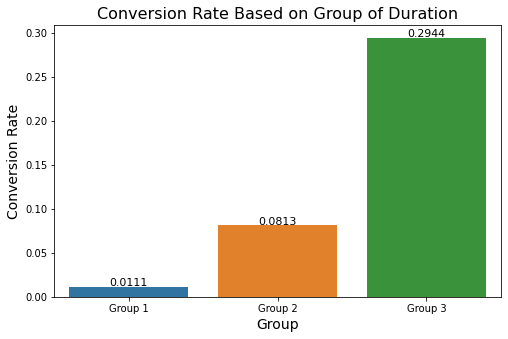

In [ ]:
plt.figure(figsize = (8,5))
bar = ['Group 1','Group 2','Group 3']
value = [conversion_rate10, conversion_rate11, conversion_rate12]
barplot = sns.barplot(bar,value);

plt.title('Conversion Rate Based on Group of Duration', size = 16)
plt.xlabel('Group', fontsize = 14)
plt.ylabel('Conversion Rate', fontsize = 14);

for i in barplot.patches:
    height = i.get_height()
    barplot.text(x = i.get_x()+(i.get_width()/2), y = height+0.001, s = '{0:0.4f}'.format(height), ha = 'center', fontsize = 11);

In [ ]:
test4 = st.f_oneway(g10['open'], g11['open'], g12['open'])
test4

F_onewayResult(statistic=2764.793327628303, pvalue=0.0)

In [ ]:
p_value4 = test4.pvalue
print('p-value :',p_value4)
if p_value4 >= 0.05:
    print('Dapat disimpulkan tidak cukup bukti untuk menyatakan bahwa campaign dapat mempengaruhi y.')
else :
    print('Dapat disimpulkan cukup bukti untuk menyatakan bahwa campaign dapat mempengaruhi y.')

p-value : 0.0
Dapat disimpulkan cukup bukti untuk menyatakan bahwa campaign dapat mempengaruhi y.


##Handling Outlier

Karena metode Z-score dan IQR tidak cocok untuk dataset ini, maka handling outlier dilakukan dengan cara filter manual.
<br>Z-score terkendala dengan zero value dan negatif value, sementara IQR menghilangkan terlalu banyak data (>6000 rows)

In [70]:
df = df[(df['balance'] <= 50000)]

In [71]:
df = df[(df['duration'] <= 3700)]

In [72]:
df = df[(df['campaign'] <= 48)]

In [73]:
df = df[(df['previous'] != 275)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45183 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45183 non-null  int64 
 1   job        45183 non-null  object
 2   marital    45183 non-null  object
 3   education  45183 non-null  object
 4   default    45183 non-null  object
 5   balance    45183 non-null  int64 
 6   housing    45183 non-null  object
 7   loan       45183 non-null  object
 8   contact    45183 non-null  object
 9   day        45183 non-null  int64 
 10  month      45183 non-null  object
 11  duration   45183 non-null  int64 
 12  campaign   45183 non-null  int64 
 13  pdays      45183 non-null  int64 
 14  previous   45183 non-null  int64 
 15  poutcome   45183 non-null  object
 16  y          45183 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


##Feature Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.5777615401046088


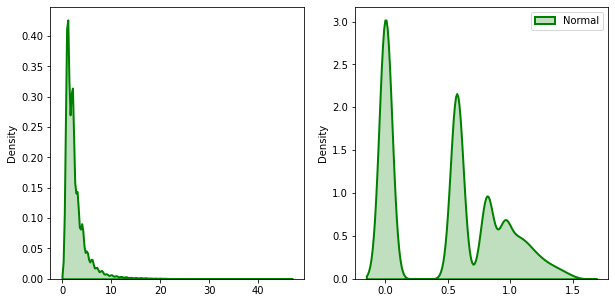

In [ ]:
for_box_cox = df['campaign'].values
fitted_data, fitted_lambda = stats.boxcox(for_box_cox)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(for_box_cox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")

In [ ]:
from scipy import stats
!pip install stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 7.9 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24299 sha256=8c4355d4e41e460809122c3576032de488f423048ac0cec3b8929d4fe6685e8d
  Stored in directory: /root/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats


In [ ]:
from stats.special import boxcox1p
stats.special.boxcox1p(x, lmbda)

for_box_cox = df['campaign'].values
fitted_data, fitted_lambda = s.special.boxcox1p(for_box_cox, lmbda)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(for_box_cox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")

ModuleNotFoundError: ignored

**Tidak dapat dilakukan feature transformation**:
1. Log transformation; box-cox: terkendala zero dan negative value.
2. Standarisasi; Normalisasi: terkendala distribusi data yang skewed.

##Feature Encoding

In [74]:
for col in cats2:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column marital
married     27195
single      12784
divorced     5204
Name: marital, dtype: int64
------------------------------ 

value counts of column education
secondary    23191
tertiary     13290
primary       6847
unknown       1855
Name: education, dtype: int64
------------------------------ 

value counts of column default
no     44368
yes      815
Name: default, dtype: int64
------------------------------ 

value counts of column housing
yes    25120
no     20063
Name: housing, dtype: int64
------------------------------ 

value counts of column loan
no     37941
yes     7242
Name: loan, dtype: int64
------------------------------ 

value counts of column contact
cellular     29272
unknown      13010
telephone     2901
Name: contact, dtype: int64
------------------------------ 

value counts of column month
may    13760
jul     6892
aug     6241
jun     5337
nov     3967
apr     2931
feb     2647
jan     1403
oct      737
sep      578
mar      477
dec      213


Label Encoding : `education`, `default`, `housing`, `loan`, `month`
<br>OHE : `marital`, `contact`, `poutcome`

In [75]:
mapping_education = {
    'tertiary' : 3,
    'secondary' : 2,
    'primary' : 1,
    'unknown' : 0
}

mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1
} 

mapping_loan = {
    'no' : 0,
    'yes' : 1    
}

mapping_month = {
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12
}


df['education'] = df['education'].map(mapping_education)
df['default'] = df['default'].map(mapping_default)
df['housing'] = df['housing'].map(mapping_housing)
df['loan'] = df['loan'].map(mapping_loan)
df['month'] = df['month'].map(mapping_month)

In [76]:
for cat in ['marital', 'contact', 'poutcome']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [77]:
df = df.drop(columns = ['marital', 'contact', 'poutcome'])

In [78]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,3,0,2143,1,0,5,5,261,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,2,0,29,1,0,5,5,151,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,2,0,2,1,1,5,5,76,...,0,1,0,0,0,1,0,0,0,1
3,47,blue-collar,0,0,1506,1,0,5,5,92,...,0,1,0,0,0,1,0,0,0,1
4,33,unknown,0,0,1,0,0,5,5,198,...,0,0,1,0,0,1,0,0,0,1


## Feature Engineering

#### Feature Selection

In [79]:
df.corr()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.173836,-0.017818,0.094362,-0.185049,-0.015479,-0.008755,0.092574,-0.006234,0.006473,...,0.164693,0.286262,-0.427825,-0.068229,0.169602,-0.019841,-0.004737,-0.023328,0.034948,-0.000512
education,-0.173836,1.000000,-0.009034,0.054800,-0.038642,0.004258,0.021755,0.067975,0.002031,0.001550,...,0.005630,-0.126064,0.133013,0.161659,-0.075432,-0.129691,0.018149,0.008320,0.037135,-0.036137
default,-0.017818,-0.009034,1.000000,-0.072818,-0.006061,0.077228,0.009404,0.015023,-0.009965,0.017445,...,0.017780,-0.014451,0.003103,-0.010097,-0.017183,0.019953,-0.026419,-0.014440,-0.023342,0.039509
balance,0.094362,0.054800,-0.072818,1.000000,-0.067784,-0.090618,0.010478,0.099111,0.023634,-0.016176,...,-0.024976,0.027149,-0.011803,0.018911,0.034167,-0.038444,0.016446,0.008114,0.035011,-0.033673
housing,-0.185049,-0.038642,-0.006061,-0.067784,1.000000,0.041249,-0.028273,-0.173785,0.005447,-0.026102,...,0.001922,0.017620,-0.020511,-0.156125,-0.080658,0.208352,0.106749,0.039718,-0.091221,-0.063817
loan,-0.015479,0.004258,0.077228,-0.090618,0.041249,1.000000,0.011247,0.021699,-0.012040,0.010235,...,0.016421,0.036867,-0.051704,0.013418,-0.013038,-0.007096,-0.002239,-0.009039,-0.053677,0.031391
day,-0.008755,0.021755,0.009404,0.010478,-0.028273,0.011247,1.000000,0.101979,-0.030402,0.163892,...,-0.000375,0.007115,-0.007466,0.020299,0.023776,-0.034283,-0.068786,-0.032994,-0.030152,0.086271
month,0.092574,0.067975,0.015023,0.099111,-0.173785,0.021699,0.101979,1.000000,-0.012979,0.056568,...,0.000370,0.062828,-0.068541,0.153809,0.037193,-0.182379,-0.055908,-0.062719,0.034096,0.061222
duration,-0.006234,0.002031,-0.009965,0.023634,0.005447,-0.012040,-0.030402,-0.012979,1.000000,-0.086444,...,0.006425,-0.023160,0.020616,0.027242,-0.024974,-0.015217,-0.018725,-0.001989,0.042825,-0.003828
campaign,0.006473,0.001550,0.017445,-0.016176,-0.026102,0.010235,0.163892,0.056568,-0.086444,1.000000,...,-0.014941,0.031610,-0.023764,-0.030652,0.055673,0.002196,-0.089070,-0.019960,-0.058165,0.108964


In [80]:
abs(df.corr()['y'])

age                  0.024452
education            0.051249
default              0.022413
balance              0.055528
housing              0.138987
loan                 0.068132
day                  0.028300
month                0.018773
duration             0.397138
campaign             0.073710
pdays                0.103396
previous             0.113627
y                    1.000000
marital_divorced     0.002462
marital_married      0.060268
marital_single       0.063753
contact_cellular     0.136078
contact_telephone    0.013694
contact_unknown      0.150955
poutcome_failure     0.009932
poutcome_other       0.031744
poutcome_success     0.306471
poutcome_unknown     0.166774
Name: y, dtype: float64

In [81]:
#Drop feature yang berkorelasi rendah
good_cor = abs(df.corr()['y'][abs(df.corr()['y'])>0.05]).index.tolist()
df1 = df[good_cor]

#Drop feature yang redundant
df1 = df1.drop(columns=['pdays'])
df1.head()

,education,balance,housing,loan,duration,campaign,previous,y,marital_married,marital_single,contact_cellular,contact_unknown,poutcome_success,poutcome_unknown
0,3,2143,1,0,261,1,0,0,1,0,0,1,0,1
1,2,29,1,0,151,1,0,0,0,1,0,1,0,1
2,2,2,1,1,76,1,0,0,1,0,0,1,0,1
3,0,1506,1,0,92,1,0,0,1,0,0,1,0,1
4,0,1,0,0,198,1,0,0,0,1,0,1,0,1


#### Feature Extraction


In [ ]:
df3 = df.copy()
df3['duration_minute'] = (df['duration'] / 60).round(1)
df3.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,duration_minute
0,58,management,3,0,2143,1,0,5,5,261,...,1,0,0,0,1,0,0,0,1,4.4
1,44,technician,2,0,29,1,0,5,5,151,...,0,1,0,0,1,0,0,0,1,2.5
2,33,entrepreneur,2,0,2,1,1,5,5,76,...,1,0,0,0,1,0,0,0,1,1.3
3,47,blue-collar,0,0,1506,1,0,5,5,92,...,1,0,0,0,1,0,0,0,1,1.5
4,33,unknown,0,0,1,0,0,5,5,198,...,0,1,0,0,1,0,0,0,1,3.3




```
# This is formatted as code
```

Mengubah duration pada satuan detik menjadi menit agar lebih mudah dipahami

#### Feature Tambahan

In [ ]:
cost_perminute = 0.01
df3['cost'] = (df['duration'] * cost_perminute).round(2)
df3.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,duration_minute,cost
0,58,management,3,0,2143,1,0,5,5,261,...,0,0,0,1,0,0,0,1,4.4,2.61
1,44,technician,2,0,29,1,0,5,5,151,...,1,0,0,1,0,0,0,1,2.5,1.51
2,33,entrepreneur,2,0,2,1,1,5,5,76,...,0,0,0,1,0,0,0,1,1.3,0.76
3,47,blue-collar,0,0,1506,1,0,5,5,92,...,0,0,0,1,0,0,0,1,1.5,0.92
4,33,unknown,0,0,1,0,0,5,5,198,...,1,0,0,1,0,0,0,1,3.3,1.98


Menambahkan fitur tambahan cost yaitu biaya tambahan dengan tarif 0.01 euro per menit, sehingga menjadi bisa menjadi pertimbangan perusahaan untuk memperhatikan duration

In [ ]:
df3['balance'].describe()

count    45183.000000
mean      1336.447912
std       2743.643005
min      -8019.000000
25%         72.000000
50%        448.000000
75%       1424.500000
max      45789.000000
Name: balance, dtype: float64

In [ ]:
df3['group_balance'] = np.where(df3['balance'] >= 1428, 'High', 
                                             np.where(df3['balance'] >= 448, 'Mid', 
                                                      np.where(df3['balance'] > 0, 'Low', 'indebt')))
df3.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,duration_minute,cost,group_balance
0,58,management,3,0,2143,1,0,5,5,261,...,0,0,1,0,0,0,1,4.4,2.61,High
1,44,technician,2,0,29,1,0,5,5,151,...,0,0,1,0,0,0,1,2.5,1.51,Low
2,33,entrepreneur,2,0,2,1,1,5,5,76,...,0,0,1,0,0,0,1,1.3,0.76,Low
3,47,blue-collar,0,0,1506,1,0,5,5,92,...,0,0,1,0,0,0,1,1.5,0.92,High
4,33,unknown,0,0,1,0,0,5,5,198,...,0,0,1,0,0,0,1,3.3,1.98,Low


Mengkategorikan nasabah sesuai dengan balancenya

In [ ]:
df3['group_age'] = np.where(df3['age'] > 65, 'High', 
                                             np.where(df3['age'] > 25, 'Adults', 
                                                      np.where(df3['age'] > 15, 'Youth', 'Children')))
df3.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,duration_minute,cost,group_balance,group_age
0,58,management,3,0,2143,1,0,5,5,261,...,0,1,0,0,0,1,4.4,2.61,High,Adults
1,44,technician,2,0,29,1,0,5,5,151,...,0,1,0,0,0,1,2.5,1.51,Low,Adults
2,33,entrepreneur,2,0,2,1,1,5,5,76,...,0,1,0,0,0,1,1.3,0.76,Low,Adults
3,47,blue-collar,0,0,1506,1,0,5,5,92,...,0,1,0,0,0,1,1.5,0.92,High,Adults
4,33,unknown,0,0,1,0,0,5,5,198,...,0,1,0,0,0,1,3.3,1.98,Low,Adults


Mengkategorikan nasabah sesuai dengan umurnya, agar dapat diperhatikan usia produktif untuk bekerja

##Imbalance Data

In [82]:
df1.y.value_counts()

0    39899
1     5284
Name: y, dtype: int64

In [83]:
X = df1[[col for col in df1.columns if (str(df1[col].dtype) != 'object') and col not in ['y']]]
y = df1['y'].values
print(X.shape)
print(y.shape)

(45183, 13)
(45183,)


In [91]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    39899
1    39899
dtype: int64


#Machine Learning

## Split Data Train & Test

In [85]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size = 0.2, random_state = 42)

In [93]:
X_train.shape

(63838, 13)

In [94]:
X_test.shape

(15960, 13)

##Modeling (Finding The Best Algorithm)

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [98]:
models = {
    "DecisionTree"      : DecisionTreeClassifier(random_state=42),
    "RandomForest"      : RandomForestClassifier(random_state=42),
    "GradientBoosting"  : GradientBoostingClassifier(random_state=42)
}

for model_name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)[:,1]

    print("\n")
    print("Evaluate model: {}".format(model_name))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print("AUC: "+str(round(auc*100,2))+'%')

    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("accuracy: "+str(round(accuracy*100,2))+'%')
    
    precision = metrics.precision_score(y_test, y_pred)
    print("precision: "+str(round(precision*100,2))+'%')

    recall = metrics.recall_score(y_test, y_pred)
    print("recall: "+str(round(recall*100,2))+'%')

    f1_score = ((2 * precision * recall)/(precision + recall))
    print("F1 score: "+str(round(f1_score*100,2))+'%')

    train_score = clf.score(X_train, y_train)
    print("train_score: "+str(round(train_score*100,2))+'%')

    test_score = clf.score(X_test, y_test)
    print("test_score: "+str(round(test_score*100,2))+'%')
    print("\n")



Evaluate model: DecisionTree
AUC: 88.83%
accuracy: 88.82%
precision: 87.93%
recall: 90.16%
F1 score: 89.03%
train_score: 99.99%
test_score: 88.82%




Evaluate model: RandomForest
AUC: 97.24%
accuracy: 91.38%
precision: 90.4%
recall: 92.7%
F1 score: 91.54%
train_score: 99.99%
test_score: 91.38%




Evaluate model: GradientBoosting
AUC: 95.99%
accuracy: 89.23%
precision: 88.85%
recall: 89.86%
F1 score: 89.35%
train_score: 89.85%
test_score: 89.23%




##Hyperparameter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#List of Hyper-parameters will be tested
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)], # Number of subtrees
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]+[None],  # Maximum depth of each subtree
                       min_samples_split = [2, 5, 10]
                      )


In [100]:
# Inisialiasi model
clf = RandomForestClassifier(random_state=42)
clf_tuned = RandomizedSearchCV(clf, hyperparameters, cv=5, random_state=12, scoring='precision', n_iter=15)
clf_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15,
                   param_distributions={'max_depth': [10, 43, 76, 110, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200]},
                   random_state=12, scoring='precision')

In [101]:
# Predict & Evaluation
y_pred = clf_tuned.predict(X_test)
probs = clf_tuned.predict_proba(X_test)[:,1]

In [103]:
print(y_pred)
print(probs)

[0 0 0 ... 1 1 1]
[0.49113152 0.44390641 0.         ... 0.94742857 0.96710884 0.90795692]


###Check The Best Hyper-Parameters

In [102]:
for key, value in hyperparameters.items() :
        print(key+':', clf_tuned.best_estimator_.get_params()[key])

n_estimators: 175
max_depth: 43
min_samples_split: 5


##Model Evaluation

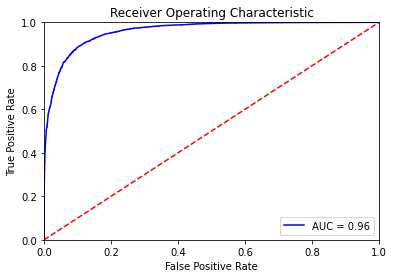

In [104]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Feature Importance

In [105]:
clf_tuned.best_estimator_.feature_importances_

array([0.02276521, 0.11402032, 0.11434977, 0.0285804 , 0.35914542,
       0.03926539, 0.03577036, 0.05391773, 0.03172553, 0.01760321,
       0.07111136, 0.00567571, 0.10606958])

Text(0.5, 1.0, 'feature importance score')

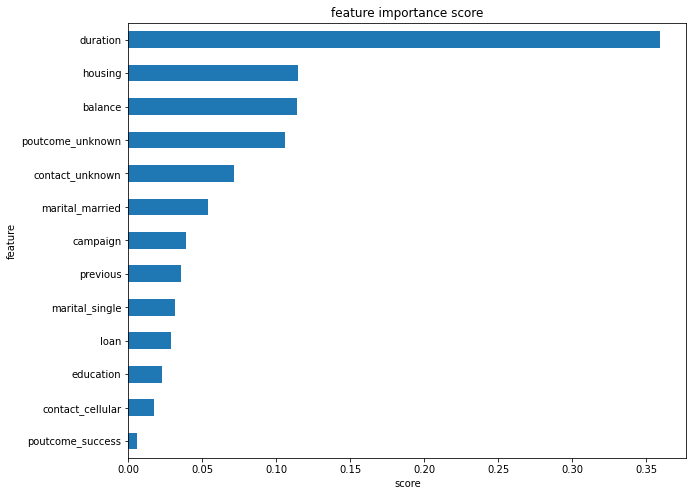

In [106]:
feat_importances = pd.Series(clf_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')